# Exploratory Data Analysis
---

<img src="../png/EDA.png" align="center" width="700px">
<div style="text-align: right"> *image from [Wikipedia](https://en.wikipedia.org/wiki/Exploratory_data_analysis)* </div>


## Customer Churn

Also known as customer attrition, or customer turnover is the loss of clients or customers. Customer churn is a critical metric because it is much less expensive to retain existing customers than it is to acquire new ones. 

Companies usually make a distinction between voluntary churn and involuntary churn. In most analyses involuntary churn is excluded. 

Predictive analytics uses churn prediction models to predict the possibility of a customer churning. These models will generate a small subgroup of potential customers that are at a higher risk of abandoning the company. They are effective at focusing customer retention marketing programs on the subset of the customer base on who are most vulnerable to churn.

## Data

** Telcom Customer Churn**

The data was downloaded from IBM Sample Data Sets: https://www.ibm.com/communities/analytics/watson-analytics-blog/guide-to-sample-datasets/

Each row represents a customer, each column contains customer's attributes described below:

* **customerID**: Customer ID
* **gender**: Customer gender (female, male)
* **SeniorCitizen**: Whether the customer is a senior citizen or not (1, 0)
* **Partner**: Whether the customer has a partner or not (Yes, No)
* **Dependents**: Whether the customer has dependents or not (Yes, No)
* **tenure**: Number of months the customer has stayed with the company
* **PhoneService**: Whether the customer has a phone service or not (Yes, No)
* **MultipleLines**: Whether the customer has multiple lines or not (Yes, No, No phone service)
* **InternetService**: Customer's internet service provider (DSL, Fiber optic, No)
* **OnlineSecurity**: Whether the customer has online security or not (Yes, No, No internet service)
* **OnlineBackup**: Whether the customer has online backup or not (Yes, No, No internet service)
* **DeviceProtection**: Whether the customer has device protection or not (Yes, No, No internet service)
* **TechSupport**: Whether the customer has tech support or not (Yes, No, No internet service)
* **StreamingTV**: Whether the customer has streaming TV or not (Yes, No, No internet service)
* **StreamingMovies**: Whether the customer has streaming movies or not (Yes, No, No internet service)
* **Contract**: The contract term of the customer (Month-to-month, One year, Two year)
* **PaperlessBilling**: Whether the customer has paperless billing or not (Yes, No)
* **PaymentMethod**: The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* **MonthlyCharges**: The amount charged to the customer monthly
* **TotalCharges**: The total amount charged to the customer
* **Churn**: Whether the customer churned or not (Yes or No)

The data set includes information about:

* Customers who left within the last month - the column is called `Churn`
* Services that each customer has signed up for - phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information - how long they've been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers - gender, age range, and if they have partners and dependents

In [1]:
# loading libraries
library(tidyverse)
library(reshape2)
library(rsample)
library(recipes)
library(caret)
library(e1071)
library(pROC)

# modifying chart size
options(repr.plot.width=5, repr.plot.height=3)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Loading required package: broom

Attaching package: ‘rsample’

The following object is masked from ‘package:tidyr’:

    fill


Attaching package: ‘recipes’

The following object is masked from ‘package:stringr’:

    fixed

The following object is masked from ‘package:stats’:

    step

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked fr

Loading the data into a dataframe:

In [2]:
telcoChurnDf <- read_csv("../data/Telco-Customer-Churn.csv")

Parsed with column specification:
cols(
  .default = col_character(),
  SeniorCitizen = col_integer(),
  tenure = col_integer(),
  MonthlyCharges = col_double(),
  TotalCharges = col_double()
)
See spec(...) for full column specifications.


In [3]:
glimpse(telcoChurnDf)

Observations: 7,043
Variables: 21
$ customerID       <chr> "7590-VHVEG", "5575-GNVDE", "3668-QPYBK", "7795-CF...
$ gender           <chr> "Female", "Male", "Male", "Male", "Female", "Femal...
$ SeniorCitizen    <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Partner          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "...
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No...
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service"...
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber ...
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes"...
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No",...
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No",...
$ TechSupport     

7043 observations with 21 variables.

All the columns have been loaded with the correct data type.

In [4]:
summary(telcoChurnDf)

  customerID           gender          SeniorCitizen      Partner         
 Length:7043        Length:7043        Min.   :0.0000   Length:7043       
 Class :character   Class :character   1st Qu.:0.0000   Class :character  
 Mode  :character   Mode  :character   Median :0.0000   Mode  :character  
                                       Mean   :0.1621                     
                                       3rd Qu.:0.0000                     
                                       Max.   :1.0000                     
                                                                          
  Dependents            tenure      PhoneService       MultipleLines     
 Length:7043        Min.   : 0.00   Length:7043        Length:7043       
 Class :character   1st Qu.: 9.00   Class :character   Class :character  
 Mode  :character   Median :29.00   Mode  :character   Mode  :character  
                    Mean   :32.37                                        
                    3rd Qu.:55

**Checking for missing value**

In [5]:
map_int(telcoChurnDf, function(x) sum(is.na(x)))

customerID           gender    SeniorCitizen          Partner 
               0                0                0                0 
      Dependents           tenure     PhoneService    MultipleLines 
               0                0                0                0 
 InternetService   OnlineSecurity     OnlineBackup DeviceProtection 
               0                0                0                0 
     TechSupport      StreamingTV  StreamingMovies         Contract 
               0                0                0                0 
PaperlessBilling    PaymentMethod   MonthlyCharges     TotalCharges 
               0                0                0               11 
           Churn 
               0

In [6]:
telcoChurnDf %>%
  filter(is.na(TotalCharges))

customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,⋯,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NA,No
3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NA,No
5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,⋯,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NA,No
4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NA,No
1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,⋯,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NA,No
7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NA,No
3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NA,No
2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NA,No
2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,⋯,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NA,No
4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,⋯,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NA,No


* There are only 11 missing data in the `TotalCharges` field. Everything about these customers seem normal but perhaps they are new so they haven't received any charges yet. Since this is not a significant number of customers we will remove them from the dataset.
* `customerID` has no potential predictive or descriptive power, so we will drop that column.
* `Churn` column will be used very often, for a higher visibility let's bring that to the front.
* We will leave the original dataset (`telcoChurnDf`) untouched, and save all of these changes to a new dataframe:

In [7]:
# Remove unnecessary data
churnData <- telcoChurnDf %>%
  select(-customerID) %>% # Dropping customerID column since has no predictive info
  drop_na() %>% # This will remove 11 rows where TotalCharges is NA
  select(Churn, everything()) # Reordering the columns to keep churn as first

There are three continuous variables:
* `Tenure`
* `MonthlyCharges`
* `TotalCharges` 

Everything else is categorical (factor). `SeniorCitizen` is in integer format, that can be explicitly changed to categorical as well:

In [8]:
churnData$SeniorCitizen <- as.factor(ifelse(churnData$SeniorCitizen==1, 'Yes', 'No'))

In [9]:
glimpse(churnData)

Observations: 7,032
Variables: 20
$ Churn            <chr> "No", "No", "Yes", "No", "Yes", "Yes", "No", "No",...
$ gender           <chr> "Female", "Male", "Male", "Male", "Female", "Femal...
$ SeniorCitizen    <fct> No, No, No, No, No, No, No, No, No, No, No, No, No...
$ Partner          <chr> "Yes", "No", "No", "No", "No", "No", "No", "No", "...
$ Dependents       <chr> "No", "No", "No", "No", "No", "No", "Yes", "No", "...
$ tenure           <int> 1, 34, 2, 45, 2, 8, 22, 10, 28, 62, 13, 16, 58, 49...
$ PhoneService     <chr> "No", "Yes", "Yes", "No", "Yes", "Yes", "Yes", "No...
$ MultipleLines    <chr> "No phone service", "No", "No", "No phone service"...
$ InternetService  <chr> "DSL", "DSL", "DSL", "DSL", "Fiber optic", "Fiber ...
$ OnlineSecurity   <chr> "No", "Yes", "Yes", "Yes", "No", "No", "No", "Yes"...
$ OnlineBackup     <chr> "Yes", "No", "Yes", "No", "No", "No", "Yes", "No",...
$ DeviceProtection <chr> "No", "Yes", "No", "Yes", "No", "Yes", "No", "No",...
$ TechSupport     

## Visualizing the categorical variables with respect to `Churn`:

In [10]:
p1 <- ggplot(churnData, aes(x=Churn, fill = Churn)) +
  geom_bar(aes(y = (..count..)), alpha = 2/3) +
  labs(y = "Count") +
  geom_text(aes(y = (..count..), 
                label = ifelse((..count..) == 0, "", scales::percent((..count..)/sum(..count..)))), 
            stat = "count", color = "#230e0d",
            vjust = 0) + 
  scale_fill_manual( values = c("#37bf49", "#c40505")) +
  theme_minimal()

#p1

In [11]:
Churn_vs_var_plot <- function(df, var, legend){
    # Plots a bar chart showing churn, faceting by var
    #
    # Args:
    #   df: churn dataframe
    #   var: variable to be used for faceting
    #   legend: whether to include a legend or not
    #
    # Returns:
    #   A ggplot object which is a bar chart
    p <- select(df, Churn, var = var) %>% 
      group_by(var, Churn) %>%
      summarise(n = n()) %>% 
      mutate(percentage = paste0(round(n/sum(n)*100, 1), "%")) %>% 
      ggplot(aes(x = Churn, y = n, group = var, fill = Churn)) + 
        geom_bar(stat="identity", show.legend = legend, alpha = 2/3) +
        labs(y = "Count", x = var) +
        geom_text(aes(label = percentage), vjust = 0) +
        facet_grid(~var) +
        scale_fill_manual( values = c("#37bf49", "#c40505")) +
        theme_minimal()
    p
}

# Multiple graphs on one page (ggplot2)
# http://www.cookbook-r.com/Graphs/Multiple_graphs_on_one_page_(ggplot2)
#
#
# ggplot objects can be passed in ..., or to plotlist (as a list of ggplot objects)
# - cols:   Number of columns in layout
# - layout: A matrix specifying the layout. If present, 'cols' is ignored.
#
# If the layout is something like matrix(c(1,2,3,3), nrow=2, byrow=TRUE),
# then plot 1 will go in the upper left, 2 will go in the upper right, and
# 3 will go all the way across the bottom.
#
multiplot <- function(..., plotlist=NULL, file, cols=1, layout=NULL) {
  library(grid)
  
  # Make a list from the ... arguments and plotlist
  plots <- c(list(...), plotlist)
  
  numPlots = length(plots)
  
  # If layout is NULL, then use 'cols' to determine layout
  if (is.null(layout)) {
    # Make the panel
    # ncol: Number of columns of plots
    # nrow: Number of rows needed, calculated from # of cols
    layout <- matrix(seq(1, cols * ceiling(numPlots/cols)),
                     ncol = cols, nrow = ceiling(numPlots/cols))
  }
  
  if (numPlots==1) {
    print(plots[[1]])
    
  } else {
    # Set up the page
    grid.newpage()
    pushViewport(viewport(layout = grid.layout(nrow(layout), ncol(layout))))
    
    # Make each plot, in the correct location
    for (i in 1:numPlots) {
      # Get the i,j matrix positions of the regions that contain this subplot
      matchidx <- as.data.frame(which(layout == i, arr.ind = TRUE))
      
      print(plots[[i]], vp = viewport(layout.pos.row = matchidx$row,
                                      layout.pos.col = matchidx$col))
    }
  }
}

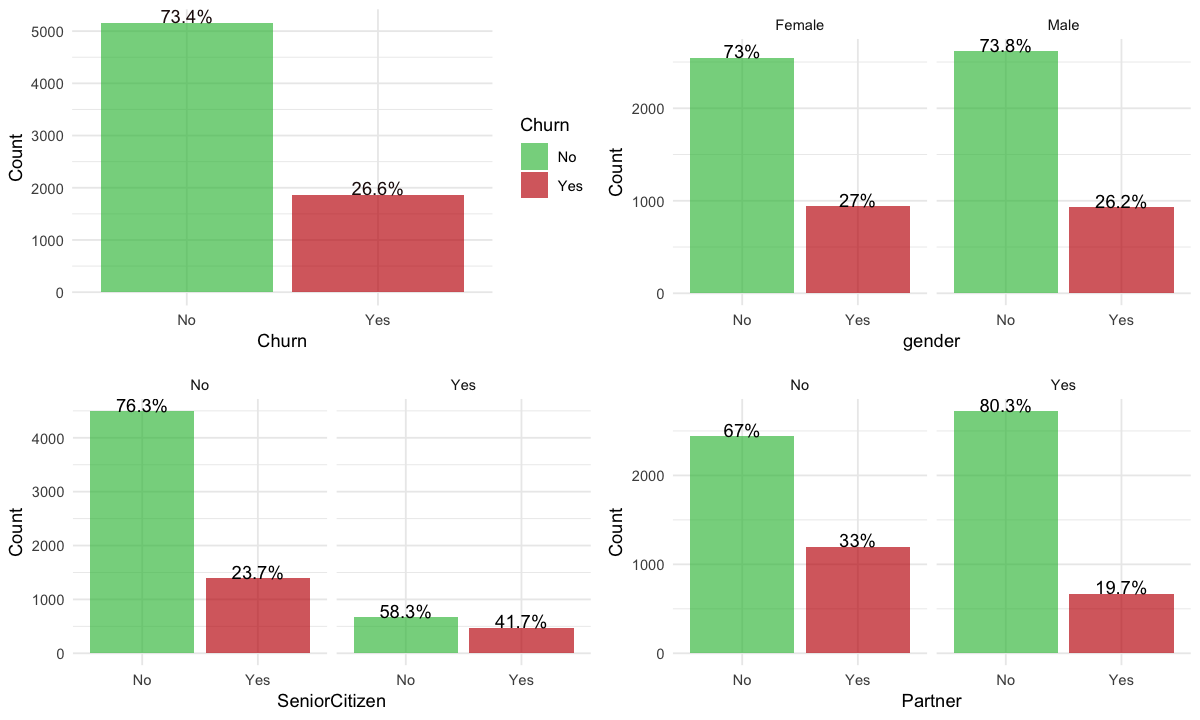

In [12]:
options(repr.plot.width=10, repr.plot.height=6)  # modifying chart size
layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(p1, 
          Churn_vs_var_plot(churnData, "gender", F),
          Churn_vs_var_plot(churnData, "SeniorCitizen", F),
          Churn_vs_var_plot(churnData, "Partner", F),
          layout=layout)
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

* **`Churn`** - The data shows that about one forth of the customers churned.
* **`gender`** - The churn percent is almost equal for both Male and Female.
* **`SeniorCitizen`** - The percent of churn is almost double in case of senior citizens.
* **`Partner`** - Customers with partners have lower churn rate.

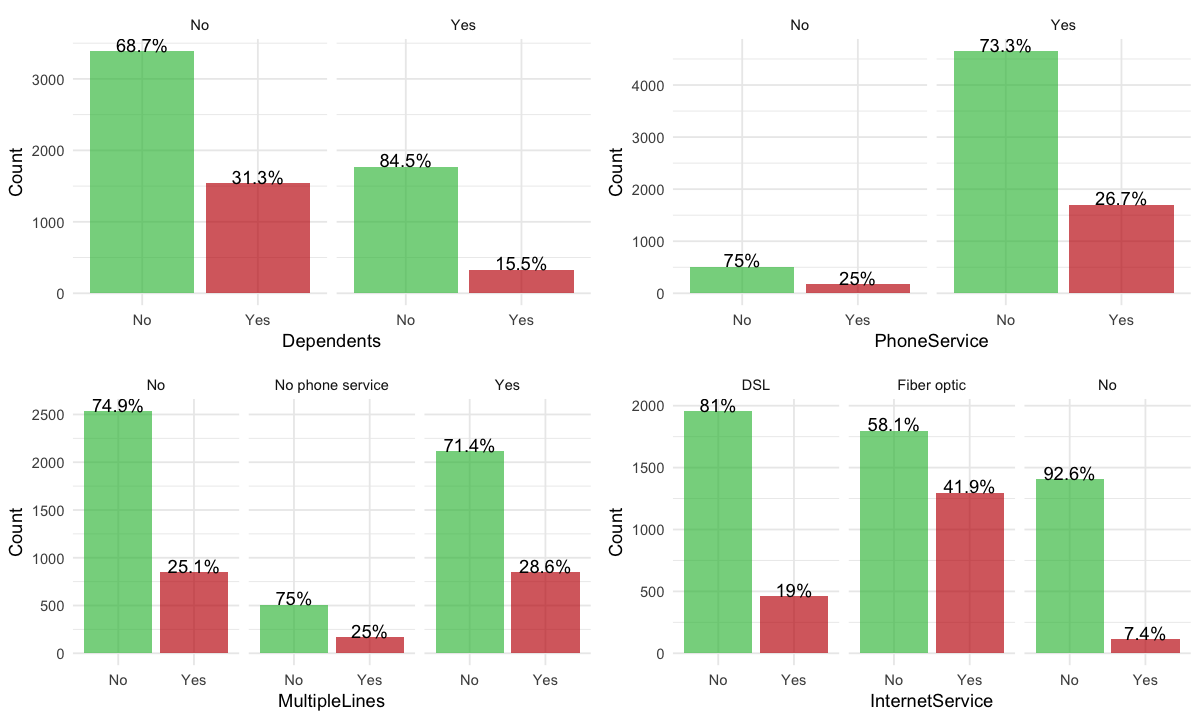

In [13]:
options(repr.plot.width=10, repr.plot.height=6)  # modifying chart size
layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(Churn_vs_var_plot(churnData, "Dependents", F),
          Churn_vs_var_plot(churnData, "PhoneService", F),
          Churn_vs_var_plot(churnData, "MultipleLines", F),
          Churn_vs_var_plot(churnData, "InternetService", F),
          layout=layout)
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

* **`Dependents`** - Customers with dependents have lower churn rate (almost half the ones without dependents).
* **`PhoneService`** - There is no significant difference among the ones with phone service and without.
* **`MultipleLines`** - There is no significant difference among the ones with multiple lines and without.
* **`InternetService`** - Seems that the customers with Fiber Optic Internet Service have a much higher churn rate compared to the ones with DSL or no Internet Services. We see a very small rate of leaving for customers with no internet services!

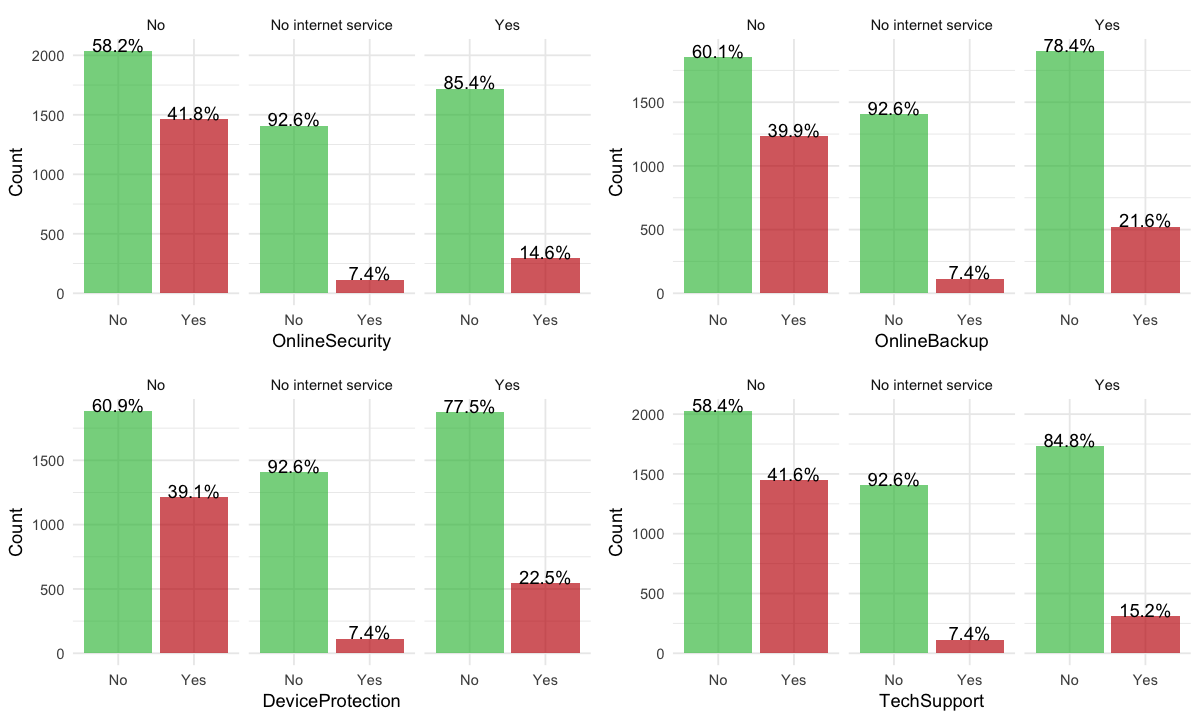

In [14]:
options(repr.plot.width=10, repr.plot.height=6)  # modifying chart size
layout <- matrix(c(1,2,3,4),2,2,byrow=TRUE)
multiplot(Churn_vs_var_plot(churnData, "OnlineSecurity", F),
          Churn_vs_var_plot(churnData, "OnlineBackup", F),
          Churn_vs_var_plot(churnData, "DeviceProtection", F),
          Churn_vs_var_plot(churnData, "TechSupport", F),
          layout=layout)
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

* Customers with that did not use these services left the company at a much higher rate: **`OnlineSecurity`**, **`OnlineBackup`**, **`DeviceProtection`**, and **`TechSupport`**.

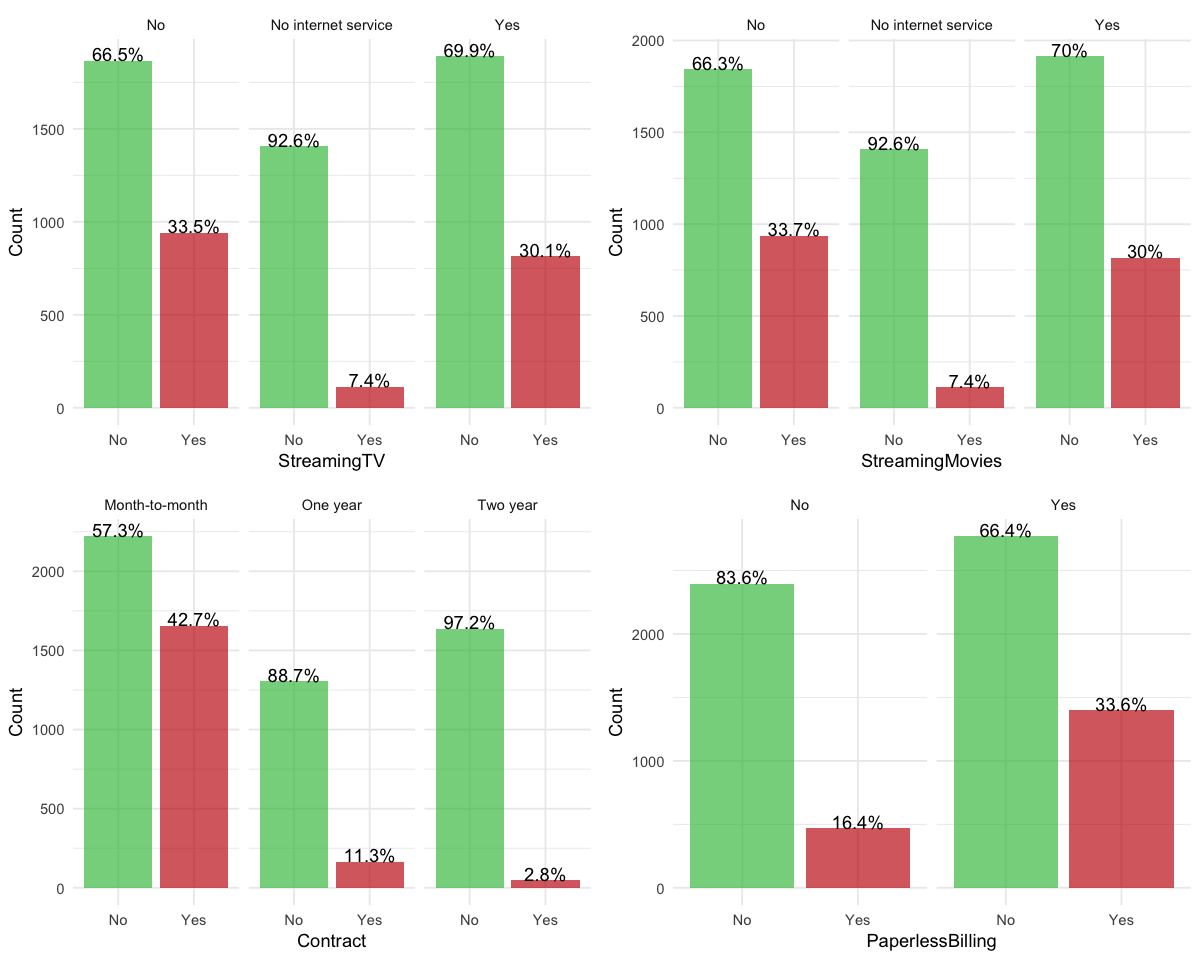

In [15]:
options(repr.plot.width=10, repr.plot.height=8)  # modifying chart size
layout <- matrix(c(1,2,3,4), 2, 2, byrow=TRUE)
multiplot(Churn_vs_var_plot(churnData, "StreamingTV", F),
          Churn_vs_var_plot(churnData, "StreamingMovies", F),
          Churn_vs_var_plot(churnData, "Contract", F),
          Churn_vs_var_plot(churnData, "PaperlessBilling", F),
          layout=layout)
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

* We saw that customers with no internet service have a higher tendency to stick with the company, hence a very low churn rate. This is also evident from **`StreamingTV`** and **`StreamingMovies`**.
* **`Contract`** - A large percentage of customers with "Month-to-Month" contract have left the company, when compared to the customers that are bound to one or two years contract.
* **`PaperlessBilling`** - Churn percent is higher in case of customers having paperless billing option.

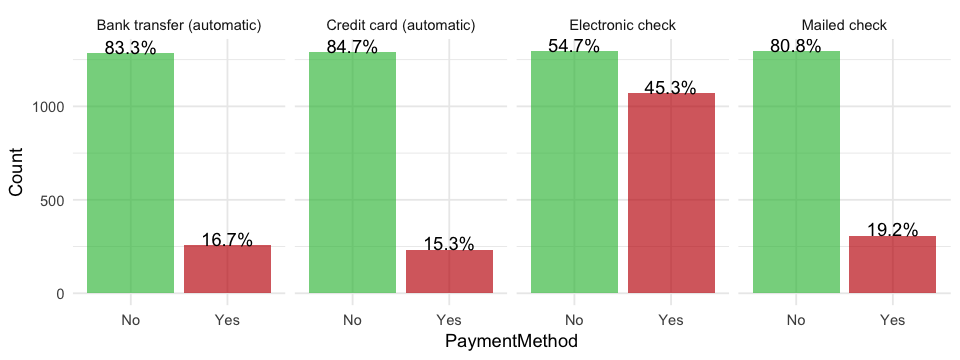

In [16]:
options(repr.plot.width=8, repr.plot.height=3)  # modifying chart size
Churn_vs_var_plot(churnData, "PaymentMethod", F)
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

* **`PaymentMethod`** - Customers who have `ElectronicCheck` as their `PaymentMethod` tend to leave the platform more when compared to other options.

## Visualizing the three continuous variables with respect to `Churn`:

### Tenure

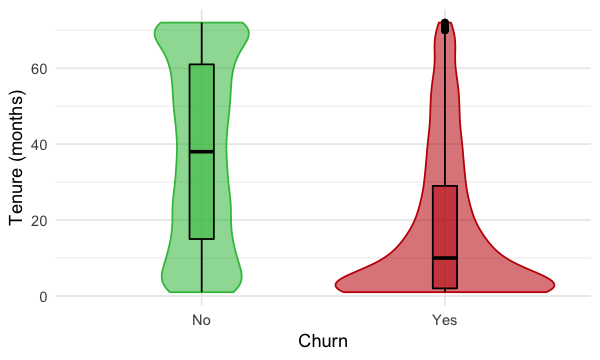

In [17]:
ggplot(churnData, aes(y = tenure, x = Churn, fill = Churn, color = Churn, alpha = 1/2)) + 
  geom_violin(trim = T, show.legend = F) +
  geom_boxplot(width = 0.1, show.legend = F, color = "black") +
  scale_fill_manual(values = c("#37bf49", "#c40505")) +
  scale_color_manual(values = c("#37bf49", "#c40505")) +
#  geom_jitter(size = 0.1, position=position_jitter(0.1), alpha = 1/10, color = "black", show.legend = F) +
  labs(y = "Tenure (months)") +
  theme_minimal()

* **`tenure`** - Median tenure of customers who left is only 10 months, while we see many customers who use the service for just 1 month.

### Monthly Charges

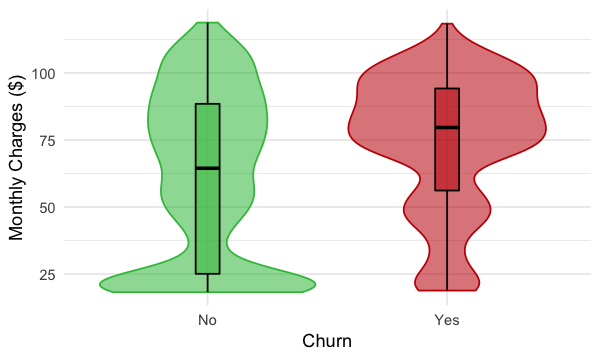

In [18]:
ggplot(churnData, aes(y = MonthlyCharges, x = Churn, fill = Churn, color = Churn, alpha = 1/2)) + 
  geom_violin(trim = T, show.legend = F) +
  geom_boxplot(width = 0.1, show.legend = F, color = "black") +
  scale_fill_manual(values = c("#37bf49", "#c40505")) +
  scale_color_manual(values = c("#37bf49", "#c40505")) +
#  geom_jitter(size = 0.1, position=position_jitter(0.1), alpha = 1/10, color = "black", show.legend = F) +
  labs(y = "Monthly Charges ($)") +
  theme_minimal()

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


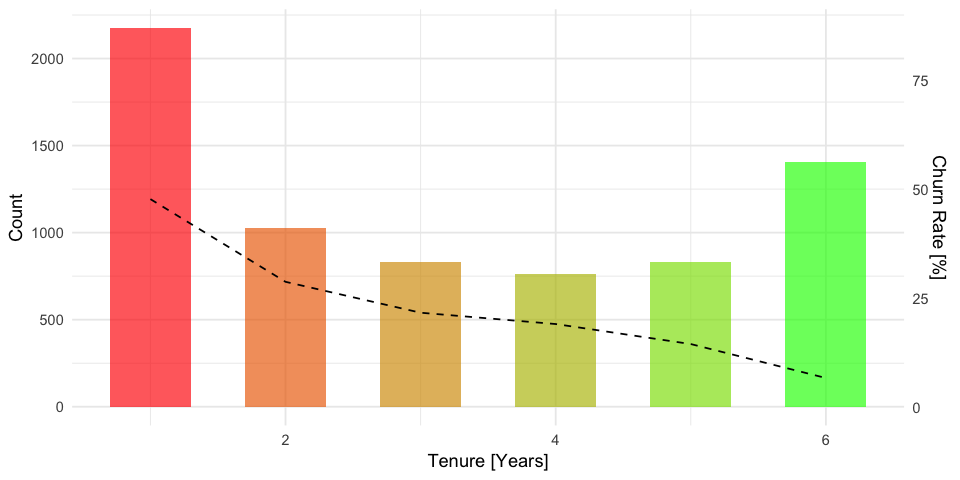

In [19]:
# Tenure

churnData_tmp <- churnData %>% 
  mutate(tenure = ceiling(tenure/12))

p <- churnData_tmp %>%
  ggplot(aes(tenure)) +
  geom_histogram(binwidth = 1) 

tenure_df <- layer_data(p,1)[,c('x','y')]
colnames(tenure_df) <- c("tenure", "Freq")
p_xmax <- layer_data(p,1)$xmax
churnData_tmp$bin <- sapply(churnData_tmp$tenure,function(x) length(p_xmax)-sum(x < p_xmax)+1)

# Now we obtain a summary of the churnData_tmp DF to calculate number of customers in each bin, avergae,
#   number of churned customers in the bin, and churn rate
hist_summary <- churnData_tmp %>%
  group_by(bin) %>%
  summarize(Freq = n(),
            mean = mean(tenure),
            n_churn = sum(Churn=='Yes')) %>%
  mutate(percentage = round(n_churn/Freq*100, 1))

options(repr.plot.width=8, repr.plot.height=4)  # modifying chart size

hist_summary %>%
  ggplot() +
    geom_bar(aes(x = mean, y = Freq, fill = mean), width = .6, 
             stat = "identity",
             show.legend = F, alpha = 2/3) +
    scale_fill_gradient(low = "red", high = "green") +
    geom_line(aes(x = mean, y = percentage*25), linetype = "dashed") +
    labs(y = "Count", x = "Tenure [Years]") +
    scale_y_continuous(limits = c(0, 2500)) +  
    scale_y_continuous(sec.axis = sec_axis(~./25, name = "Churn Rate [%]")) +
    theme_minimal()
                            
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

* **`MonthlyCharges`** - Customers who have churned have higher monthly charges in average

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


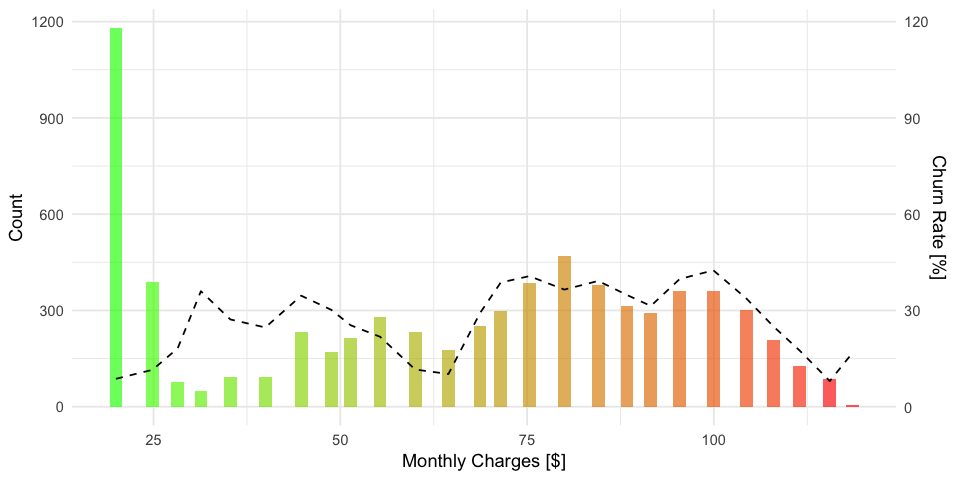

In [20]:
# Monthly charge plot

# First let's create a histogram. We can extract the values of a histogram by layer_data().
# This is useful because we can then do further analysis
p <- churnData %>%
  ggplot(aes(MonthlyCharges)) +
  geom_histogram(binwidth = 4)  

p_xmax <- layer_data(p)$xmax  # Each bin has an xmin and an xmax. We are extracting xmax, which is the upper limit of a bin
churnData_tmp <- churnData  # Making a copy of churnData for further manipulation
# Adding a new variable called bin, which specifies the bin number each customer belongs to
churnData_tmp$bin <- map_int(churnData$MonthlyCharges,function(x) as.integer(length(p_xmax)-sum(x < p_xmax)+1))

# Now we obtain a summary of the churnData_tmp DF to calculate number of customers in each bin, avergae,
#   number of churned customers in the bin, and churn rate
hist_summary <- churnData_tmp %>%
  group_by(bin) %>%
  summarize(Freq = n(),
            mean = mean(MonthlyCharges),
            n_churn = sum(Churn=='Yes')) %>%
  mutate(percentage = round(n_churn/Freq*100, 1))

options(repr.plot.width=8, repr.plot.height=4)  # modifying chart size

# Plot a bar chart based on the hist_summary. Dashed line shows the churn rate in each bucket
# Color of the bins correspond the average of MonthlyCharges in the bin
hist_summary %>%
  ggplot() +
    geom_bar(aes(x = mean, y = Freq, fill = mean), width = 1.7, 
             stat = "identity",
             show.legend = F, alpha = 2/3) +
    scale_fill_gradient(low = "green", high = "red") +
    geom_line(aes(x = mean, y = percentage*10), linetype = "dashed") +
    labs(y = "Count", x = "Monthly Charges [$]") +
    scale_y_continuous(limits = c(0, 1000)) + 
    scale_y_continuous(sec.axis = sec_axis(~./10, name = "Churn Rate [%]")) +
    theme_minimal()

options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

### Total Charges

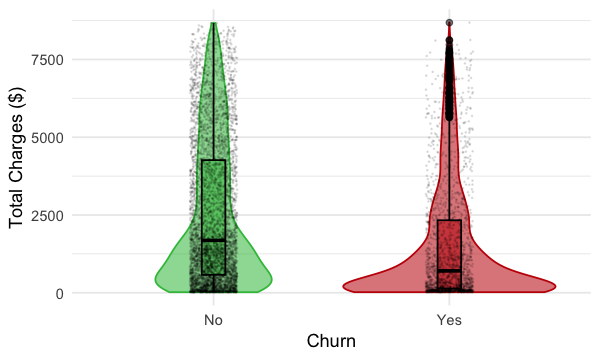

In [21]:
ggplot(churnData, aes(y = TotalCharges, x = Churn, fill = Churn, color = Churn, alpha = 1/2)) + 
  geom_violin(trim = T, show.legend = F) +
  geom_boxplot(width = 0.1, show.legend = F, color = "black") +
  scale_fill_manual(values = c("#37bf49", "#c40505")) +
  scale_color_manual(values = c("#37bf49", "#c40505")) +
  geom_jitter(size = 0.1, position=position_jitter(0.1), alpha = 1/10, color = "black", show.legend = F) +
  labs(y = "Total Charges ($)") +
  theme_minimal()

* **`TotalCharges`** - Customers who have churned have spent less money in average. This makes sense because their tenure is a lot shorter.

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.
`geom_smooth()` using method = 'loess' and formula 'y ~ x'


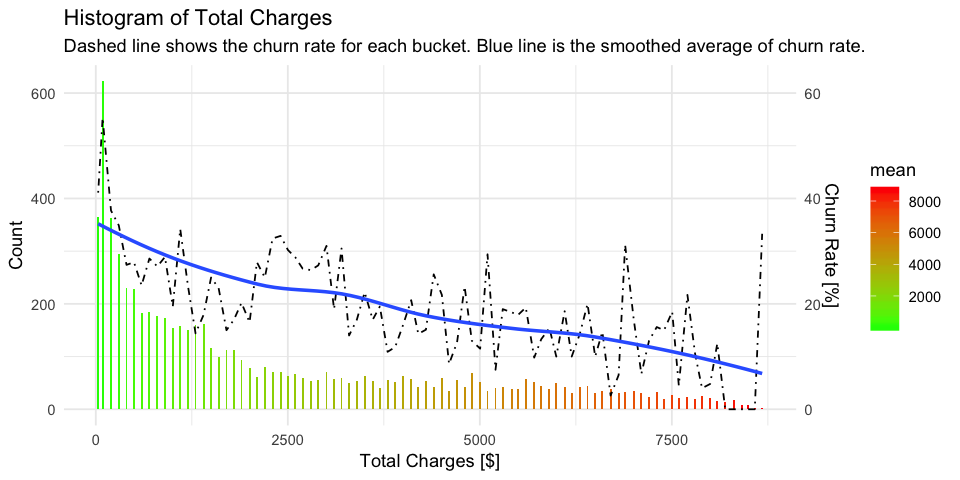

In [22]:
# Total Charges


# First let's create a histogram. We can extract the values of a histogram by layer_data().
# This is useful because we can then do further analysis
p <- churnData %>%
  ggplot(aes(TotalCharges)) +
  geom_histogram(binwidth = 100) 

p_xmax <- layer_data(p,1)$xmax  # Each bin has an xmin and an xmax. We are extracting xmax, which is the upper limit of a bin
churnData_tmp <- churnData  # Making a copy of churnData for further manipulation
# Adding a new variable called bin, which specifies the bin number each customer belongs to
churnData_tmp$bin <- map_int(churnData_tmp$TotalCharges,function(x) as.integer(length(p_xmax)-sum(x < p_xmax)+1))

# Now we obtain a summary of the churnData_tmp DF to calculate number of customers in each bin, avergae,
#   number of churned customers in the bin, and churn rate
hist_summary <- churnData_tmp %>%
  group_by(bin) %>%
  summarize(Freq = n(),
            mean = mean(TotalCharges),
            n_churn = sum(Churn=='Yes')) %>%
  mutate(percentage = round(n_churn/Freq*100, 1))

options(repr.plot.width=8, repr.plot.height=4)  # modifying chart size

# Plot a bar chart based on the hist_summary, adding a dashed line on top of it to show
#   the average of TotalCharges in each bin
hist_summary %>%
  ggplot() +
    scale_fill_gradient(low = "green", high = "red") +
    geom_bar(aes(x = mean, y = Freq, fill = mean), width = 25, stat = "identity") +
    geom_line(aes(x = mean, y = percentage*10), linetype="dotdash") +
    geom_smooth(aes(x = mean, y = percentage*10), se = F) +
    labs(y = "Count", x = "Total Charges [$]",
         title = "Histogram of Total Charges",
         subtitle = "Dashed line shows the churn rate for each bucket. Blue line is the smoothed average of churn rate.") +
    scale_y_continuous(limits = c(0, 1000)) + 
    scale_y_continuous(sec.axis = sec_axis(~./10, name = "Churn Rate [%]")) +
    theme_minimal()
                             
options(repr.plot.width=5, repr.plot.height=3)  # modifying chart size - back to normal

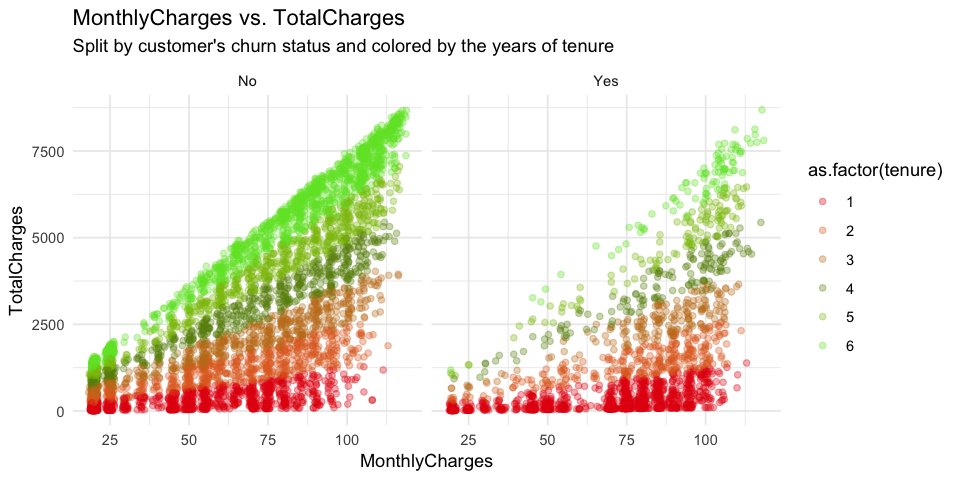

In [23]:
options(repr.plot.width=8, repr.plot.height=4)  # modifying chart size

churnData %>% 
  mutate(tenure = ceiling(tenure/12)) %>%
  ggplot(aes(MonthlyCharges, TotalCharges)) +
    geom_point(aes(color = as.factor(tenure)), alpha = 1/3) +
    facet_wrap(~Churn) + 
    scale_color_manual(values = c("#e51010", "#e26d28", "#c67d1d", "#6a8e0e", "#8cbf09", "#6ee22f")) +
    #scale_color_manual(low = "red", high = "green") +
    labs(title = "MonthlyCharges vs. TotalCharges",
         subtitle = "Split by customer's churn status and colored by the years of tenure") +
    theme_minimal()

Var1,Var2,value
MonthlyCharges,MonthlyCharges,1.00
TotalCharges,MonthlyCharges,0.65
tenure,MonthlyCharges,0.25
MonthlyCharges,TotalCharges,0.65
TotalCharges,TotalCharges,1.00
tenure,TotalCharges,0.83
MonthlyCharges,tenure,0.25
TotalCharges,tenure,0.83
tenure,tenure,1.00


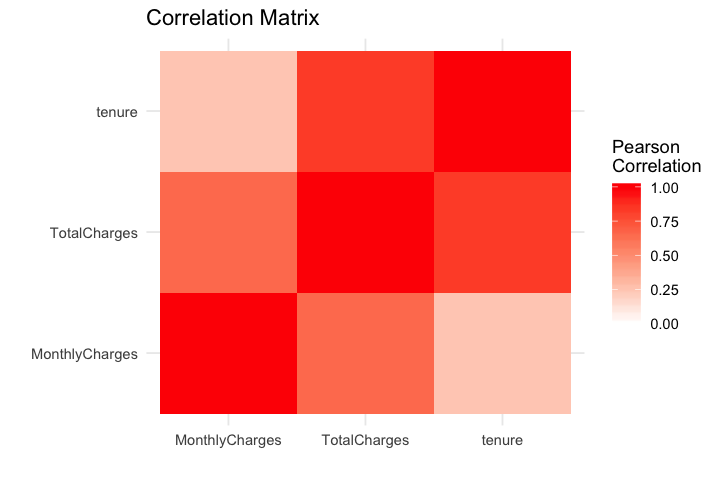

In [24]:
# Correlation matrix
cor_df <- round(cor(churnData[c("MonthlyCharges", "TotalCharges", "tenure")]), 2)
melted_df <- reshape2::melt(cor_df)
melted_df

options(repr.plot.width=6, repr.plot.height=4)  # modifying chart size

ggplot(data = melted_df, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile() +
  labs(x = "", y = "", title = "Correlation Matrix") +
  scale_fill_gradient2(low = "blue", high = "red", limit = c(0, 1), name="Pearson\nCorrelation") +
    theme_minimal()

As expected `tenure` and `TotalCharges` are highly correlated.

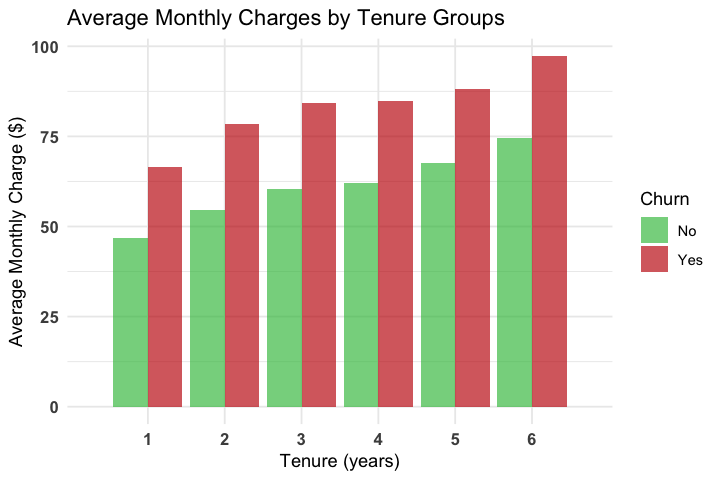

In [25]:
churnData %>% 
  mutate(tenure = ceiling(tenure/12)) %>%
  group_by(tenure, Churn) %>%
  summarize(avg_monthly_charges = mean(MonthlyCharges, na.rm = T)) %>%
  ggplot(aes(x = tenure, y = avg_monthly_charges, fill = Churn)) +
    geom_bar(stat = "identity", position = "dodge", alpha = 2/3) +
    scale_fill_manual( values = c("#37bf49", "#c40505")) +
    labs(x = "Tenure (years)", y = "Average Monthly Charge ($)",
         title = "Average Monthly Charges by Tenure Groups") +
    scale_x_discrete(limits=c("1", "2", "3", "4", "5", "6")) +
    theme_minimal() +
    theme(axis.text.x = element_text(face="bold", size=10),
          axis.text.y = element_text(face="bold", size=10))

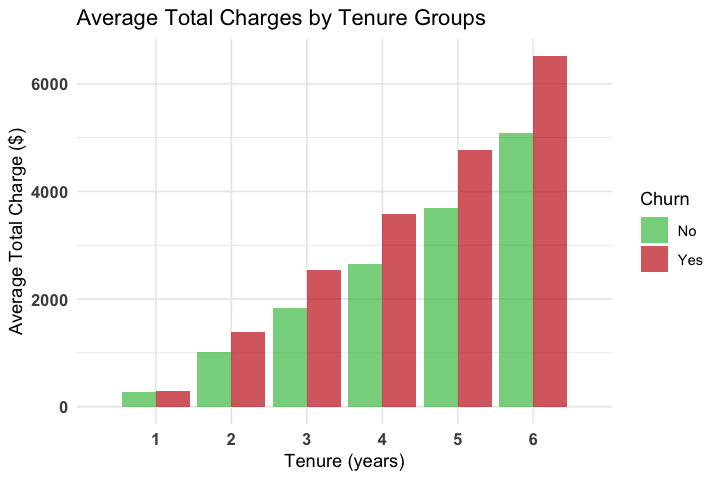

In [26]:
churnData %>% 
  mutate(tenure = ceiling(tenure/12)) %>%
  group_by(tenure, Churn) %>%
  summarize(avg_monthly_charges = mean(TotalCharges, na.rm = T)) %>%
  ggplot(aes(x = tenure, y = avg_monthly_charges, fill = Churn)) +
    geom_bar(stat = "identity", position = "dodge", alpha = 2/3) +
    scale_fill_manual( values = c("#37bf49", "#c40505")) +
    labs(x = "Tenure (years)", y = "Average Total Charge ($)",
         title = "Average Total Charges by Tenure Groups") +
    scale_x_discrete(limits=c("1", "2", "3", "4", "5", "6")) +
    theme_minimal() +
    theme(axis.text.x = element_text(face="bold", size=10),
          axis.text.y = element_text(face="bold", size=10))

# Modeling
Note: modeling is not considered as a part of EDA process. This is just a brief extra session to show case a simple predictive analysis workflow in R.

## Split test/training sets
Before training the model we should set aside a "test" set for model evaluation. We will take 25% of the records at random for test.

<img src="../png/train-test.png" align="center" width="350px">

In [27]:
set.seed(1)
train_test_split <- rsample::initial_split(churnData, prop = 0.75)

# Retrieve train and test sets
train_tbl <- rsample::training(train_test_split)
test_tbl  <- rsample::testing(train_test_split)
print(paste0("records in train dataset: ", nrow(train_tbl)))
print(paste0("records in test dataset: ", nrow(test_tbl)))

[1] "records in train dataset: 5274"
[1] "records in test dataset: 1758"


**One-hot encoding**:  transforming categorical variables into separate features. All non-numeric variables will need to be converted to categorical (dummy) variables. This is known as one-hot encoding.

## Preprocessing with Recipes package
Before feeding the training data into the model we need to perform some preprocessing steps on the data. These steps can include one-hot encoding, transformation (e.g., log transformation), scaling, centering, etc.

With recipes we can create a "recipe" for how these steps should be applied. We then use this recipe on both train and test datasets to apply the necessary changes on them.

In [28]:
# A recipe is a description of what steps should be applied to a data set in order to get it ready for data analysis.
recipe_obj <- recipes::recipe(Churn ~ ., data = train_tbl) %>%  # object = Churn ~ . meaning “Churn” is the outcome and all other features are predictors
  recipes::step_discretize(tenure, options = list(cuts = 6)) %>%  #  convert numeric data into a factor with bins having approximately the same number of data points (based on the training set)
  recipes::step_log(TotalCharges) %>%  # creates a specification of a recipe step that will log transform the variable
  recipes::step_dummy(all_nominal(), -all_outcomes()) %>%  # creates a a specification of a recipe step that will convert nominal data into one or more numeric binary
  recipes::prep(data = train_tbl)  # estimates the required parameters from a training set that can be later applied to other data sets

# Print the recipe object
recipe_obj

Data Recipe

Inputs:

      role #variables
   outcome          1
 predictor         19

Training data contained 5274 data points and no missing data.

Operations:

Dummy variables from tenure [trained]
Log transformation on TotalCharges [trained]
Dummy variables from gender, SeniorCitizen, Partner, Dependents, ... [trained]

### Applying the recipe
We can apply our "recipe" to any data set with `bake()` function. It processes the data following the steps specified in the recipe.

In [29]:
# Baking of train and test datasets (predictors only)
train <- recipes::bake(recipe_obj, newdata = train_tbl)
test  <- recipes::bake(recipe_obj, newdata = test_tbl)
glimpse(train)

Observations: 5,274
Variables: 36
$ Churn                                 <fct> No, No, Yes, No, Yes, Yes, No...
$ MonthlyCharges                        <dbl> 29.85, 56.95, 53.85, 42.30, 7...
$ TotalCharges                          <dbl> 3.396185, 7.544068, 4.683519,...
$ gender_Male                           <dbl> 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,...
$ SeniorCitizen_Yes                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ Partner_Yes                           <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,...
$ Dependents_Yes                        <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,...
$ tenure_bin1                           <dbl> 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,...
$ tenure_bin2                           <dbl> 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,...
$ tenure_bin3                           <dbl> 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,...
$ tenure_bin4                           <dbl> 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,...
$ tenure_bin5                           <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
$ tenure_bin6     

## Train a logistic regression model

In [30]:
model <- glm(Churn ~., family = "binomial", data = train)
summary(model)


Call:
glm(formula = Churn ~ ., family = "binomial", data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.1468  -0.6705  -0.2907   0.5735   3.1523  

Coefficients: (8 not defined because of singularities)
                                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)                            3.512463   1.234800   2.845  0.00445 ** 
MonthlyCharges                        -0.027034   0.036557  -0.740  0.45960    
TotalCharges                          -0.621278   0.112973  -5.499 3.81e-08 ***
gender_Male                           -0.082835   0.075893  -1.091  0.27507    
SeniorCitizen_Yes                      0.253203   0.098497   2.571  0.01015 *  
Partner_Yes                            0.029765   0.091440   0.326  0.74480    
Dependents_Yes                        -0.048985   0.104033  -0.471  0.63774    
tenure_bin1                            0.055986   0.452921   0.124  0.90162    
tenure_bin2                            0.04

In [31]:
# Model Evaluation using the test data:
prob <- predict(model, type = "response", newdata = test[,-1])
test$prob <- prob

# Using probability cutoff of 50%.
pred <- factor(ifelse(prob >= 0.50, "Yes", "No"))
actual_churn <- test$Churn
table(actual_churn, pred)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
“prediction from a rank-deficient fit may be misleading”

            pred
actual_churn   No  Yes
         No  1168  113
         Yes  223  254

In [32]:
cutoff_churn <- factor(ifelse(prob >=0.50, "Yes", "No"))
conf_final <- confusionMatrix(cutoff_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
auc <- c(AUC = roc(response = test$Churn, predictor = as.numeric(cutoff_churn)) %>% auc)
accuracy
sensitivity
specificity
auc

Accuracy 
0.8088737

Sensitivity 
  0.5324948

Specificity 
  0.9117877

AUC 
0.7221412

* **Accuracy**: percentage of correct guesses
* **Sensitivity** (also called the true positive rate, the recall, or probability of detection): measures the proportion of actual positives that are correctly identified as such (e.g., the percentage of sick people who are correctly identified as having the condition).
* **Specificity** (also called the true negative rate): measures the proportion of actual negatives that are correctly identified as such (e.g., the percentage of healthy people who are correctly identified as not having the condition).
* **AUC**: the area under the ROC curve. This means our model has a 72% chance to assign a probability to a randomly chosen churning customer which is higher than a randomly chosen non-churning customer.

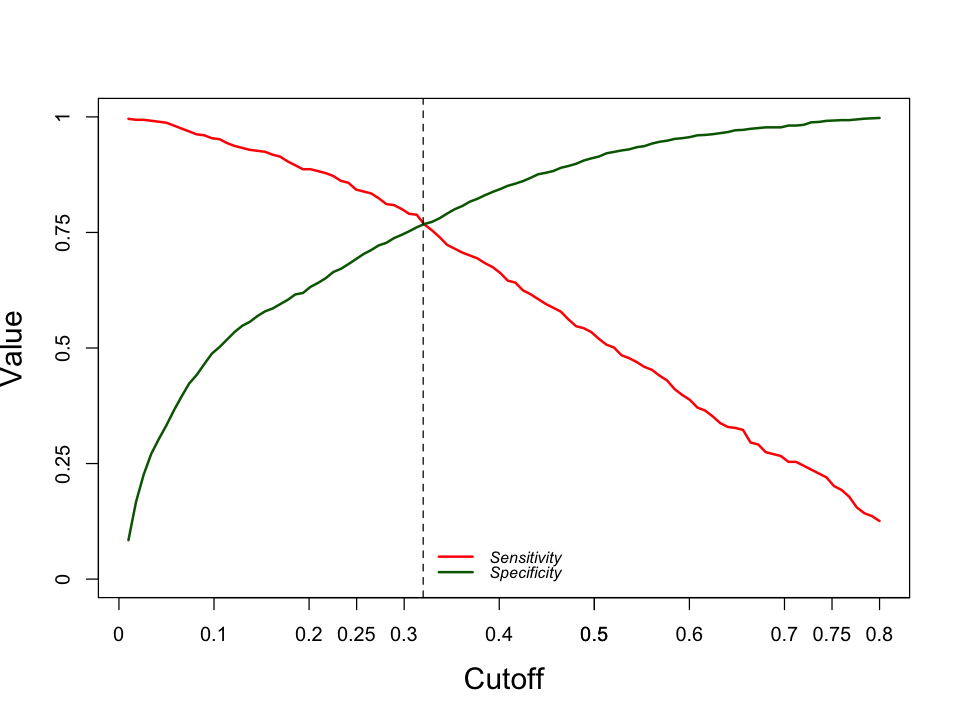

In [33]:
perform_fn <- function(prob, cutoff) 
{
  predicted_churn <- factor(ifelse(prob >= cutoff, "Yes", "No"))
  conf <- confusionMatrix(predicted_churn, actual_churn, positive = "Yes")
  sensitivity <- conf$byClass[1]
  specificity <- conf$byClass[2]
  out <- t(as.matrix(c(sensitivity, specificity))) 
  colnames(out) <- c("sensitivity", "specificity")
  return(out)
}

options(repr.plot.width =8, repr.plot.height =6)

s = seq(0.01,0.80,length=100)
OUT = matrix(0,100,2)

for(i in 1:100)
{
  OUT[i,] = perform_fn(prob, s[i])
} 

plot(s, OUT[,1], xlab = "Cutoff", ylab = "Value", cex.lab = 1.5, cex.axis = 1.5, ylim = c(0,1),
     type = "l", lwd = 2, axes = FALSE, col = 2)
axis(1, seq(0, 1, length = 5), seq(0, 1, length = 5), cex.lab = 1.5)
axis(2, seq(0, 1, length = 5), seq(0, 1, length = 5), cex.lab = 1.5)
lines(s, OUT[,2], col = "darkgreen", lwd = 2)
box()
legend("bottom", col = c(2, "darkgreen", 4, "darkred"), text.font = 3, inset = 0.02,
       box.lty = 0, cex = 0.8, 
       lwd = c(2,2,2,2), c("Sensitivity", "Specificity"))
abline(v = 0.32, col = "black", lwd = 1, lty = 2)
axis(1, at = seq(0.1, 1, by = 0.1))

We will choose a cutoff value of 0.32 to increase the accuracy:

In [34]:
prediced_churn <- factor(ifelse(prob >=0.32, "Yes", "No"))
conf_final <- confusionMatrix(prediced_churn, actual_churn, positive = "Yes")
accuracy <- conf_final$overall[1]
sensitivity <- conf_final$byClass[1]
specificity <- conf_final$byClass[2]
auc <- c(AUC = roc(response = test$Churn, predictor = as.numeric(prediced_churn)) %>% auc)
table(actual_churn, prediced_churn)
accuracy
sensitivity
specificity
auc

            prediced_churn
actual_churn  No Yes
         No  982 299
         Yes 109 368

Accuracy 
0.7679181

Sensitivity 
  0.7714885

Specificity 
  0.7665886

AUC 
0.7690385

In [35]:
predicted_test <- as.tibble(cbind(prediced_churn, test))
head(predicted_test, 10)
cat(paste0("total number of test cases: ", nrow(predicted_test)))

prediced_churn,Churn,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,tenure_bin1,tenure_bin2,⋯,StreamingTV_Yes,StreamingMovies_No.internet.service,StreamingMovies_Yes,Contract_One.year,Contract_Two.year,PaperlessBilling_Yes,PaymentMethod_Credit.card..automatic.,PaymentMethod_Electronic.check,PaymentMethod_Mailed.check,prob
Yes,Yes,104.80,8.021601,0,0,1,0,0,0,⋯,1,0,1,0,0,1,0,1,0,0.50730806
No,No,56.15,8.157069,1,0,0,1,0,0,⋯,0,0,0,1,0,0,0,0,0,0.02393182
No,No,100.35,8.644900,1,0,1,0,0,0,⋯,1,0,1,1,0,0,1,0,0,0.20081507
No,Yes,55.20,6.269759,0,0,1,1,0,1,⋯,0,0,0,0,0,0,1,0,0,0.16243532
No,No,55.30,7.333415,0,0,0,0,0,0,⋯,0,0,0,0,0,1,0,0,0,0.12461024
No,No,96.35,8.819806,0,1,1,0,0,0,⋯,0,0,0,0,1,1,1,0,0,0.03617399
Yes,No,45.25,3.812203,1,1,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0.60831799
No,No,69.20,8.491332,0,0,1,1,0,0,⋯,1,0,0,0,1,1,1,0,0,0.02066953
No,No,79.85,8.489092,0,0,0,0,0,0,⋯,1,0,0,0,1,1,1,0,0,0.01627823
No,No,76.20,6.889031,0,0,1,0,0,1,⋯,1,0,0,0,0,1,0,1,0,0.23547609


total number of test cases: 1758

            prediced_churn
actual_churn  No Yes
         No  982 299
         Yes 109 368

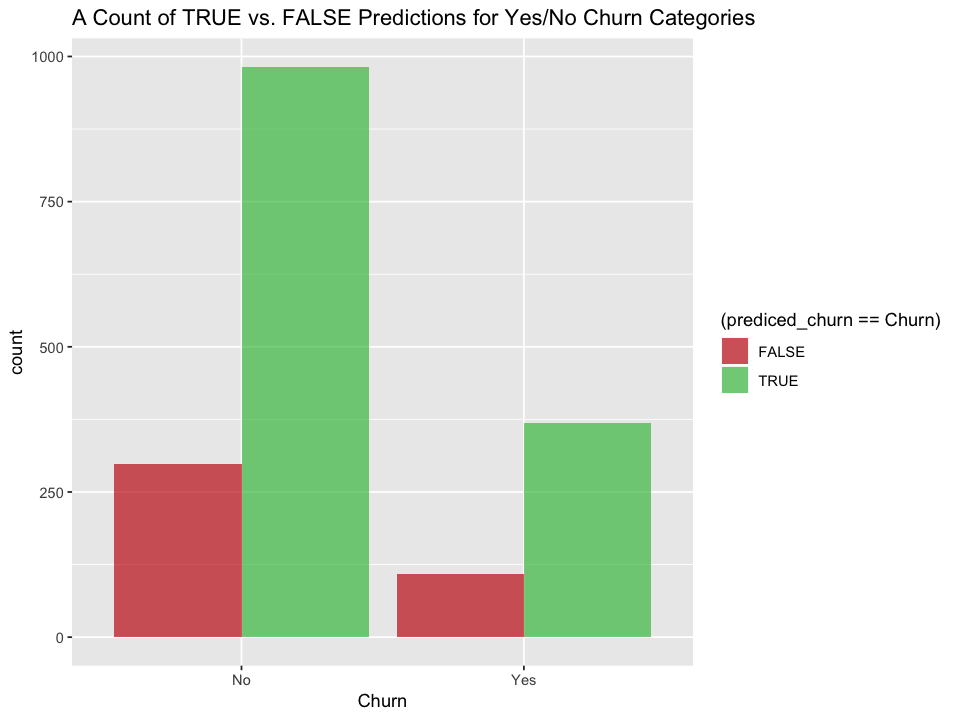

In [36]:
table(actual_churn, prediced_churn)

predicted_test %>% 
  ggplot() +
    geom_bar(aes(x = Churn, fill = (prediced_churn == Churn)), position = "dodge", alpha = 2/3) +
    scale_fill_manual( values = c("#c40505", "#37bf49")) +
    labs(title = "A Count of TRUE vs. FALSE Predictions for Yes/No Churn Categories")

Actual/Prediction

* No/No (green in the No bucket): True Negative - We accurately labeled these customers at no risk! **:-)**
* Yes/Yes (green in the Yes bucket): True Positive - We accurately predicted these churning customer! **:-)**
* No/Yes (red in the No bucket): False Positive - We thought they were leaving but they didn't! **:-|**
* Yes/No (red in the Yes bucket): False Negative - We failed predicting these churning customers! **:-(**